In [ ]:
# --- 1. Install and Setup Dependencies ---
!pip install -U ultralytics roboflow

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

import os
HOME = os.getcwd()
print("Current Directory:", HOME)

from ultralytics import YOLO
from roboflow import Roboflow

Ultralytics 8.3.122 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.0/112.6 GB disk)
Current Directory: /content


In [ ]:
# --- 2. Setup Dataset Directory ---
!mkdir {HOME}/datasets

In [ ]:
# Navigate to datasets and unzip the dataset
%cd {HOME}/datasets
!unzip Tea.v5i.yolov8.zip

# Return to HOME directory
%cd {HOME}

/content/datasets
Archive:  Tea.v5i.yolov8.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/IMG_20220503_143433_jpg.rf.1362906504c80376ff201d6f88225352.jpg  
 extracting: test/images/IMG_20220503_144214_jpg.rf.a4ca3bea8fc8e58290fa61b06407678c.jpg  
 extracting: test/images/IMG_20220503_155807_jpg.rf.83408dab8baf267ccafa7d368958cba2.jpg  
 extracting: test/images/IMG_20220503_160809_jpg.rf.c49349e89b4ab247b3b935213370ab7e.jpg  
 extracting: test/images/UNADJUSTEDNONRAW_thumb_1_jpg.rf.8fcab077e1935fcd399ef935e73bb0d6.jpg  
 extracting: test/images/UNADJUSTEDNONRAW_thumb_2d_jpg.rf.6f8e817abe80269ba08e35dc205fae14.jpg  
 extracting: test/images/UNADJUSTEDNONRAW_thumb_82_jpg.rf.4e1c4055e871c7caaa3151220f5076fe.jpg  
 extracting: test/images/UNADJUSTEDNONRAW_thumb_91_jpg.rf.c8b4cdfab31237e91077f29f1be78a4d.jpg  
   creating: test/labels/
  inflating: test

In [ ]:
!yolo task=segment mode=train \
    model=yolov8s-seg.pt \
    data=/content/datasets/data.yaml \
    epochs=100 \
    imgsz=640 \
    batch=16 \
    lr0=0.001 \
    optimizer=AdamW \
    cos_lr=True \
    warmup_epochs=3 \
    amp=True \
    patience=15 \
    verbose=True \

'''
# --- 3. Train the Segmentation Model ---
# Custom YOLOv8 model training for segmentation task
!yolo task=segment mode=train model=yolov8s-seg.pt data='/content/datasets/disease.yolov8/data.yaml' epochs=50 imgsz=640
# Increase the number of epochs for better model training
'''

100% 22.8M/22.8M [00:00<00:00, 474MB/s]
New https://pypi.org/project/ultralytics/8.3.123 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.122 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/data.yaml, epochs=100, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

"\n# --- 3. Train the Segmentation Model ---\n# Custom YOLOv8 model training for segmentation task\n!yolo task=segment mode=train model=yolov8s-seg.pt data='/content/datasets/disease.yolov8/data.yaml' epochs=50 imgsz=640\n# Increase the number of epochs for better model training\n"

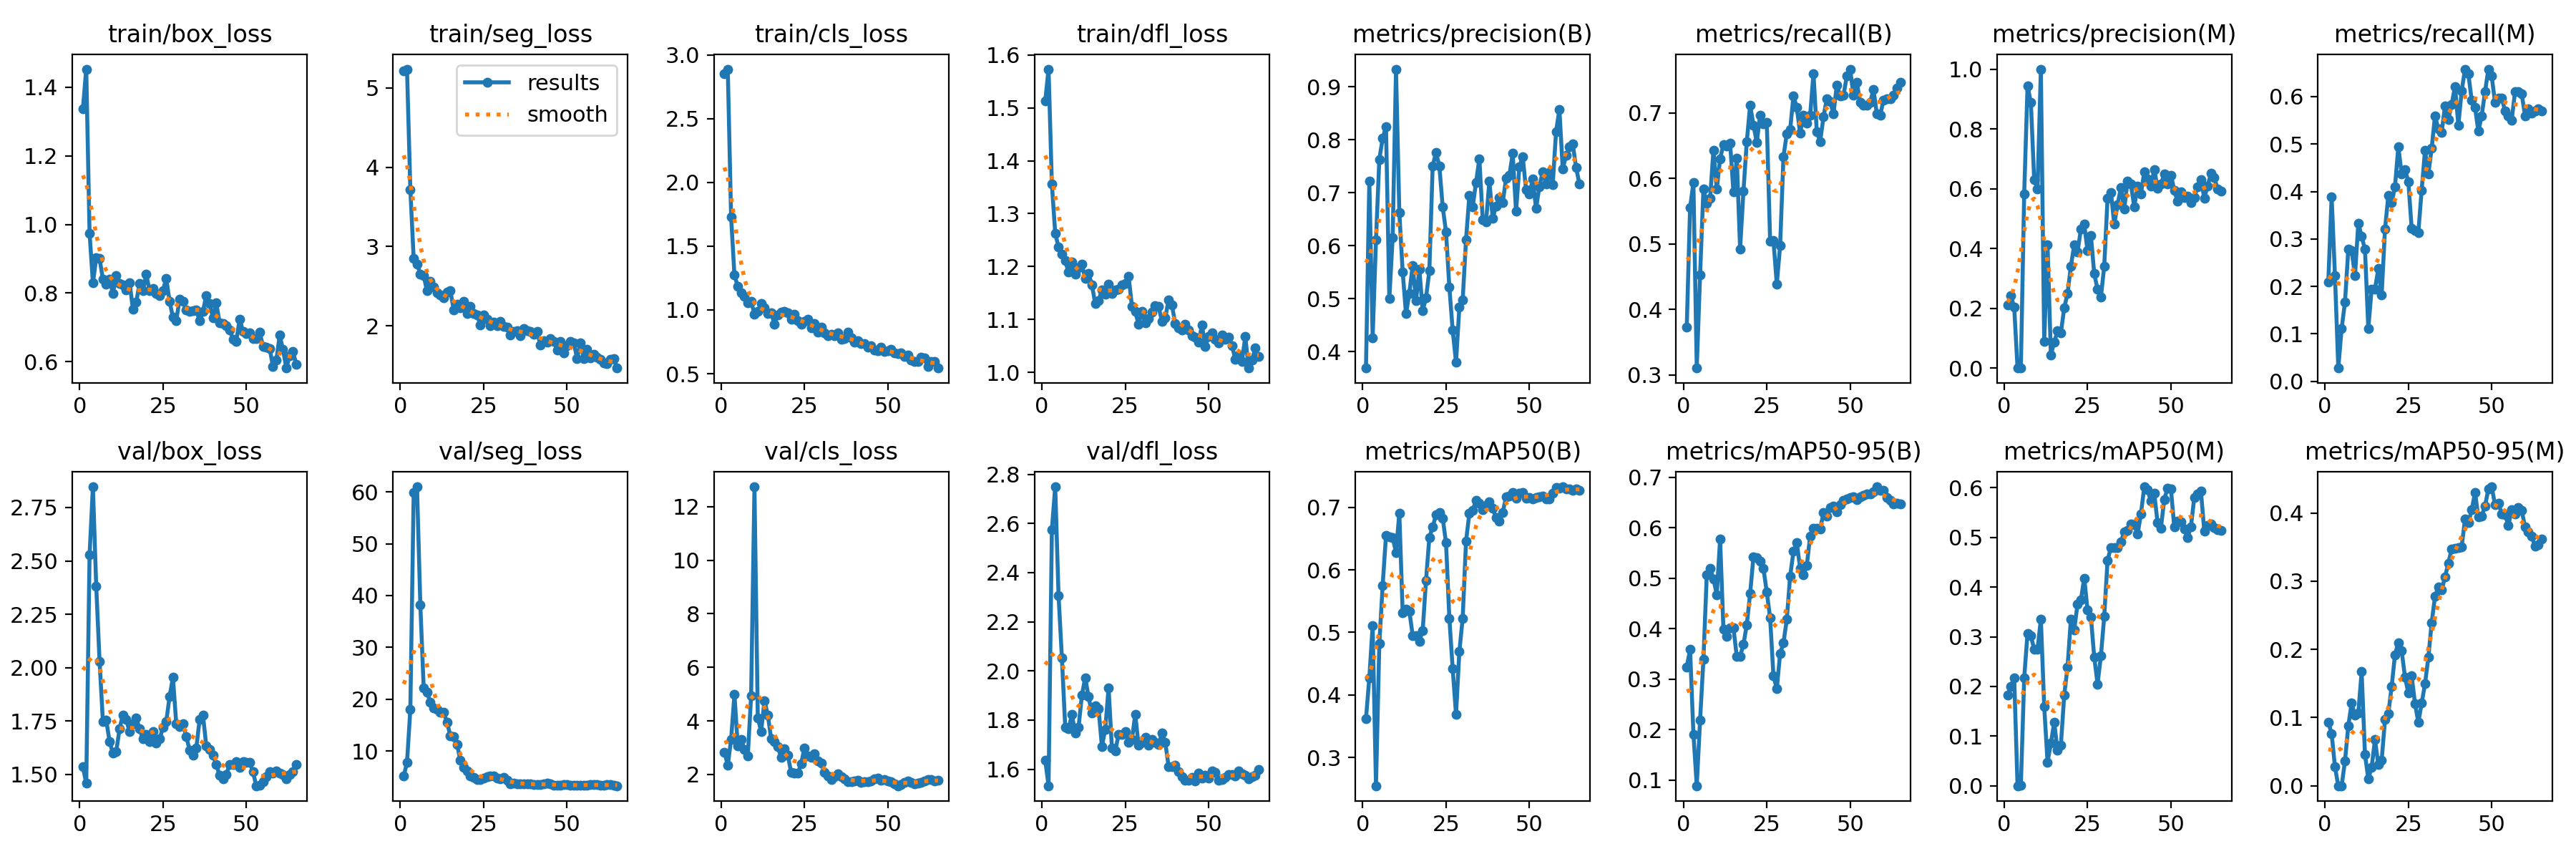

In [ ]:
# --- 4. Check Training Results and Metrics ---
# Visualize confusion matrix and training results
from IPython.display import Image
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

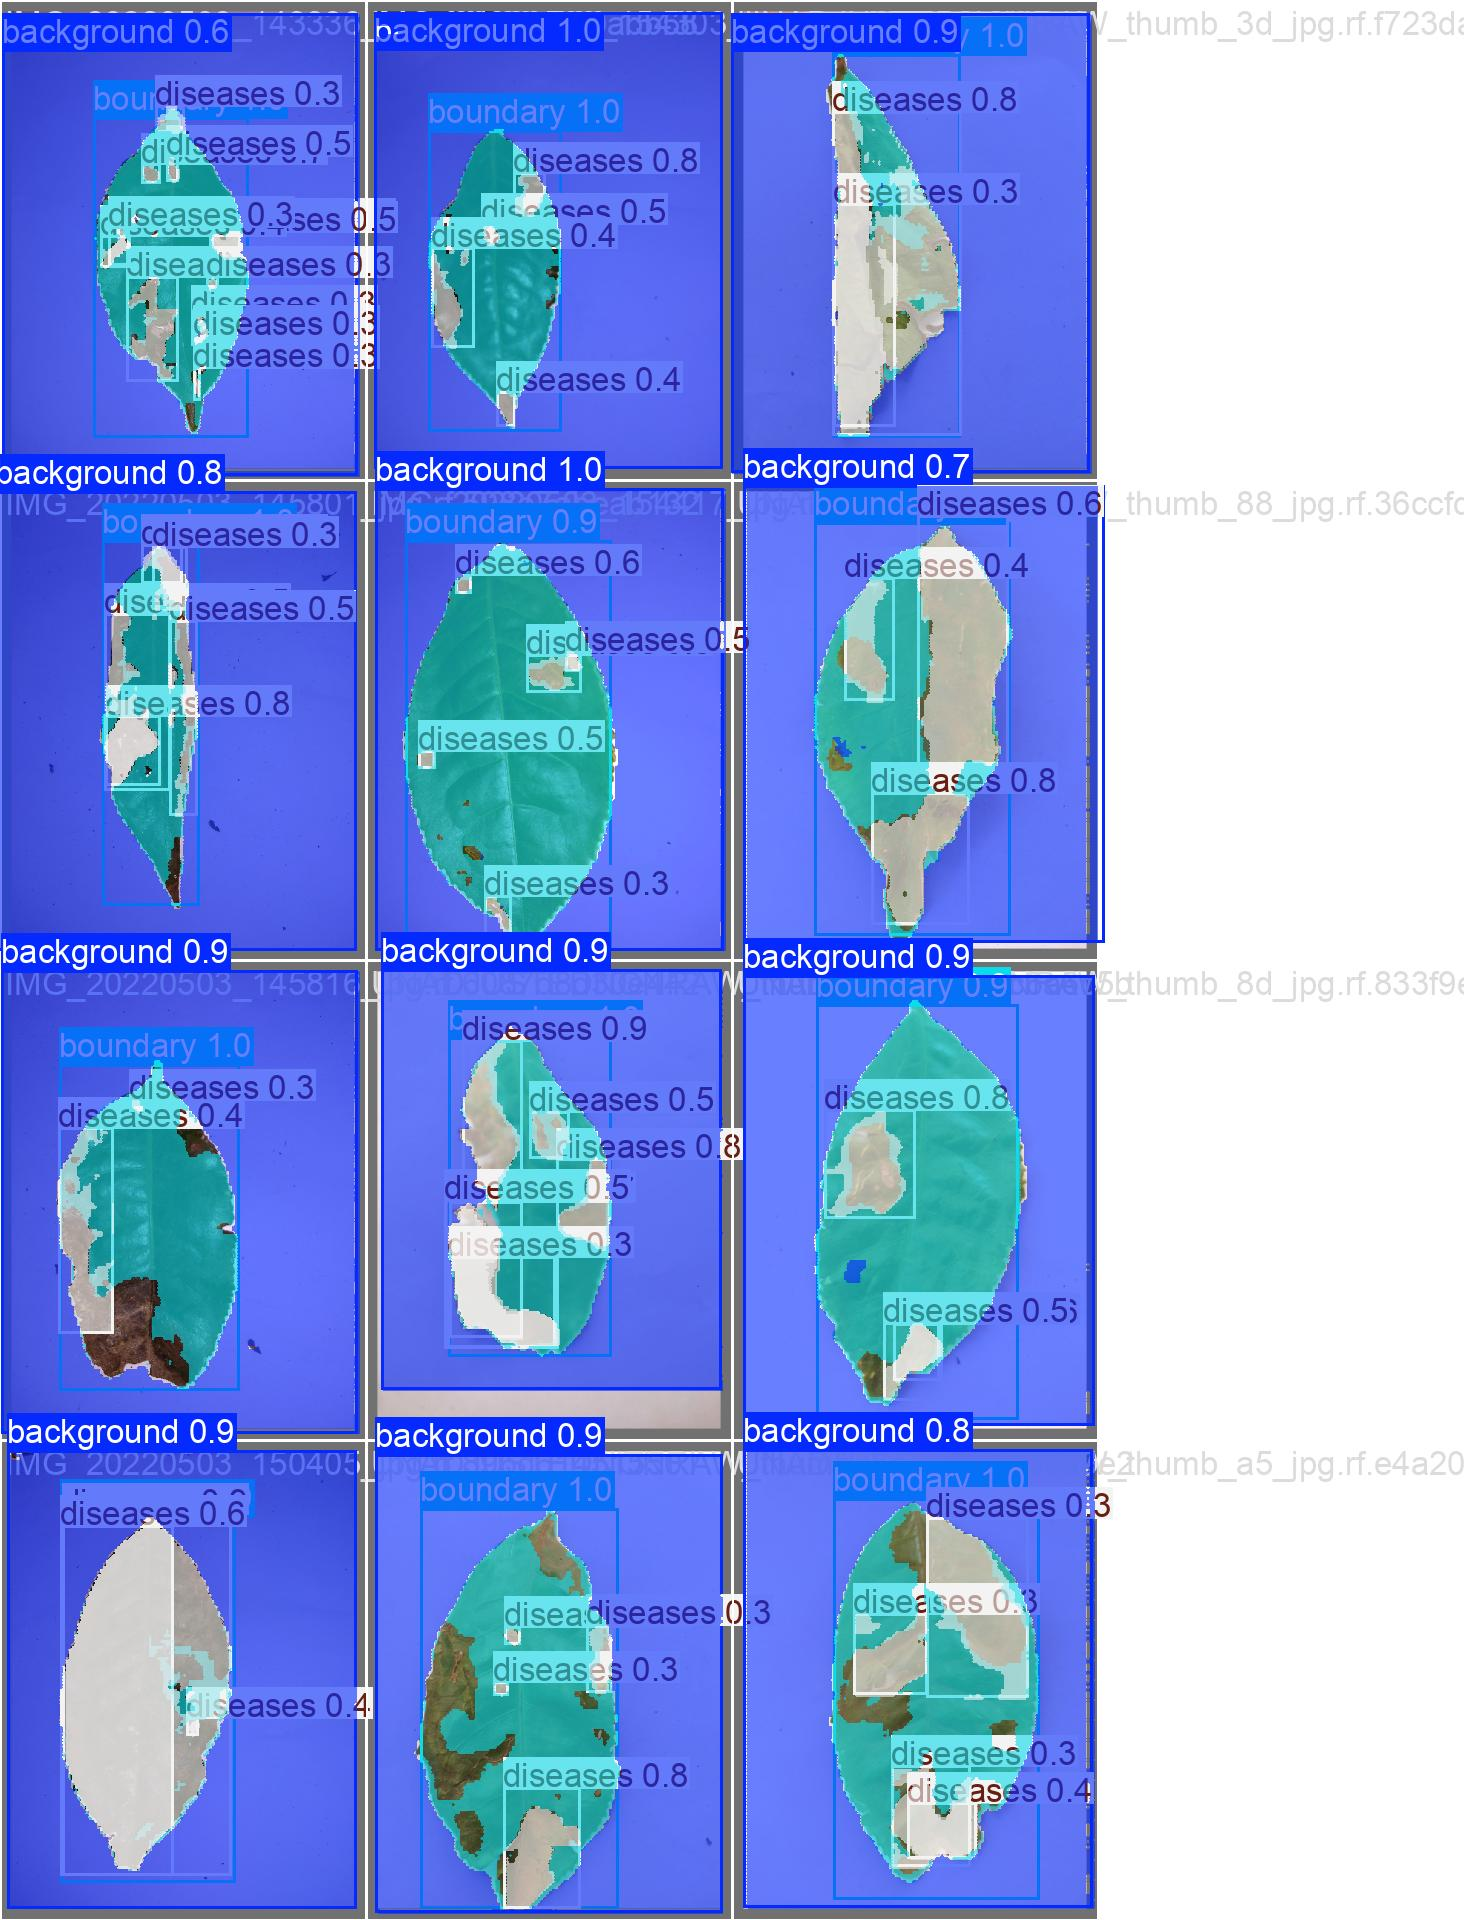

In [ ]:
# Visualize predictions from validation batch
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

In [ ]:
# --- 5. Validate the Model ---
# Run validation on the trained model
!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data='/content/datasets/data.yaml'

# --- 6. Make Predictions on Test Data ---
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt  source='/content/datasets/test/images' save=true

Ultralytics 8.3.122 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,780,761 parameters, 0 gradients, 42.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1871.2±1642.0 MB/s, size: 399.5 KB)
val: Scanning /content/datasets/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0% 0/1 [00:00<?, ?it/s]WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed.

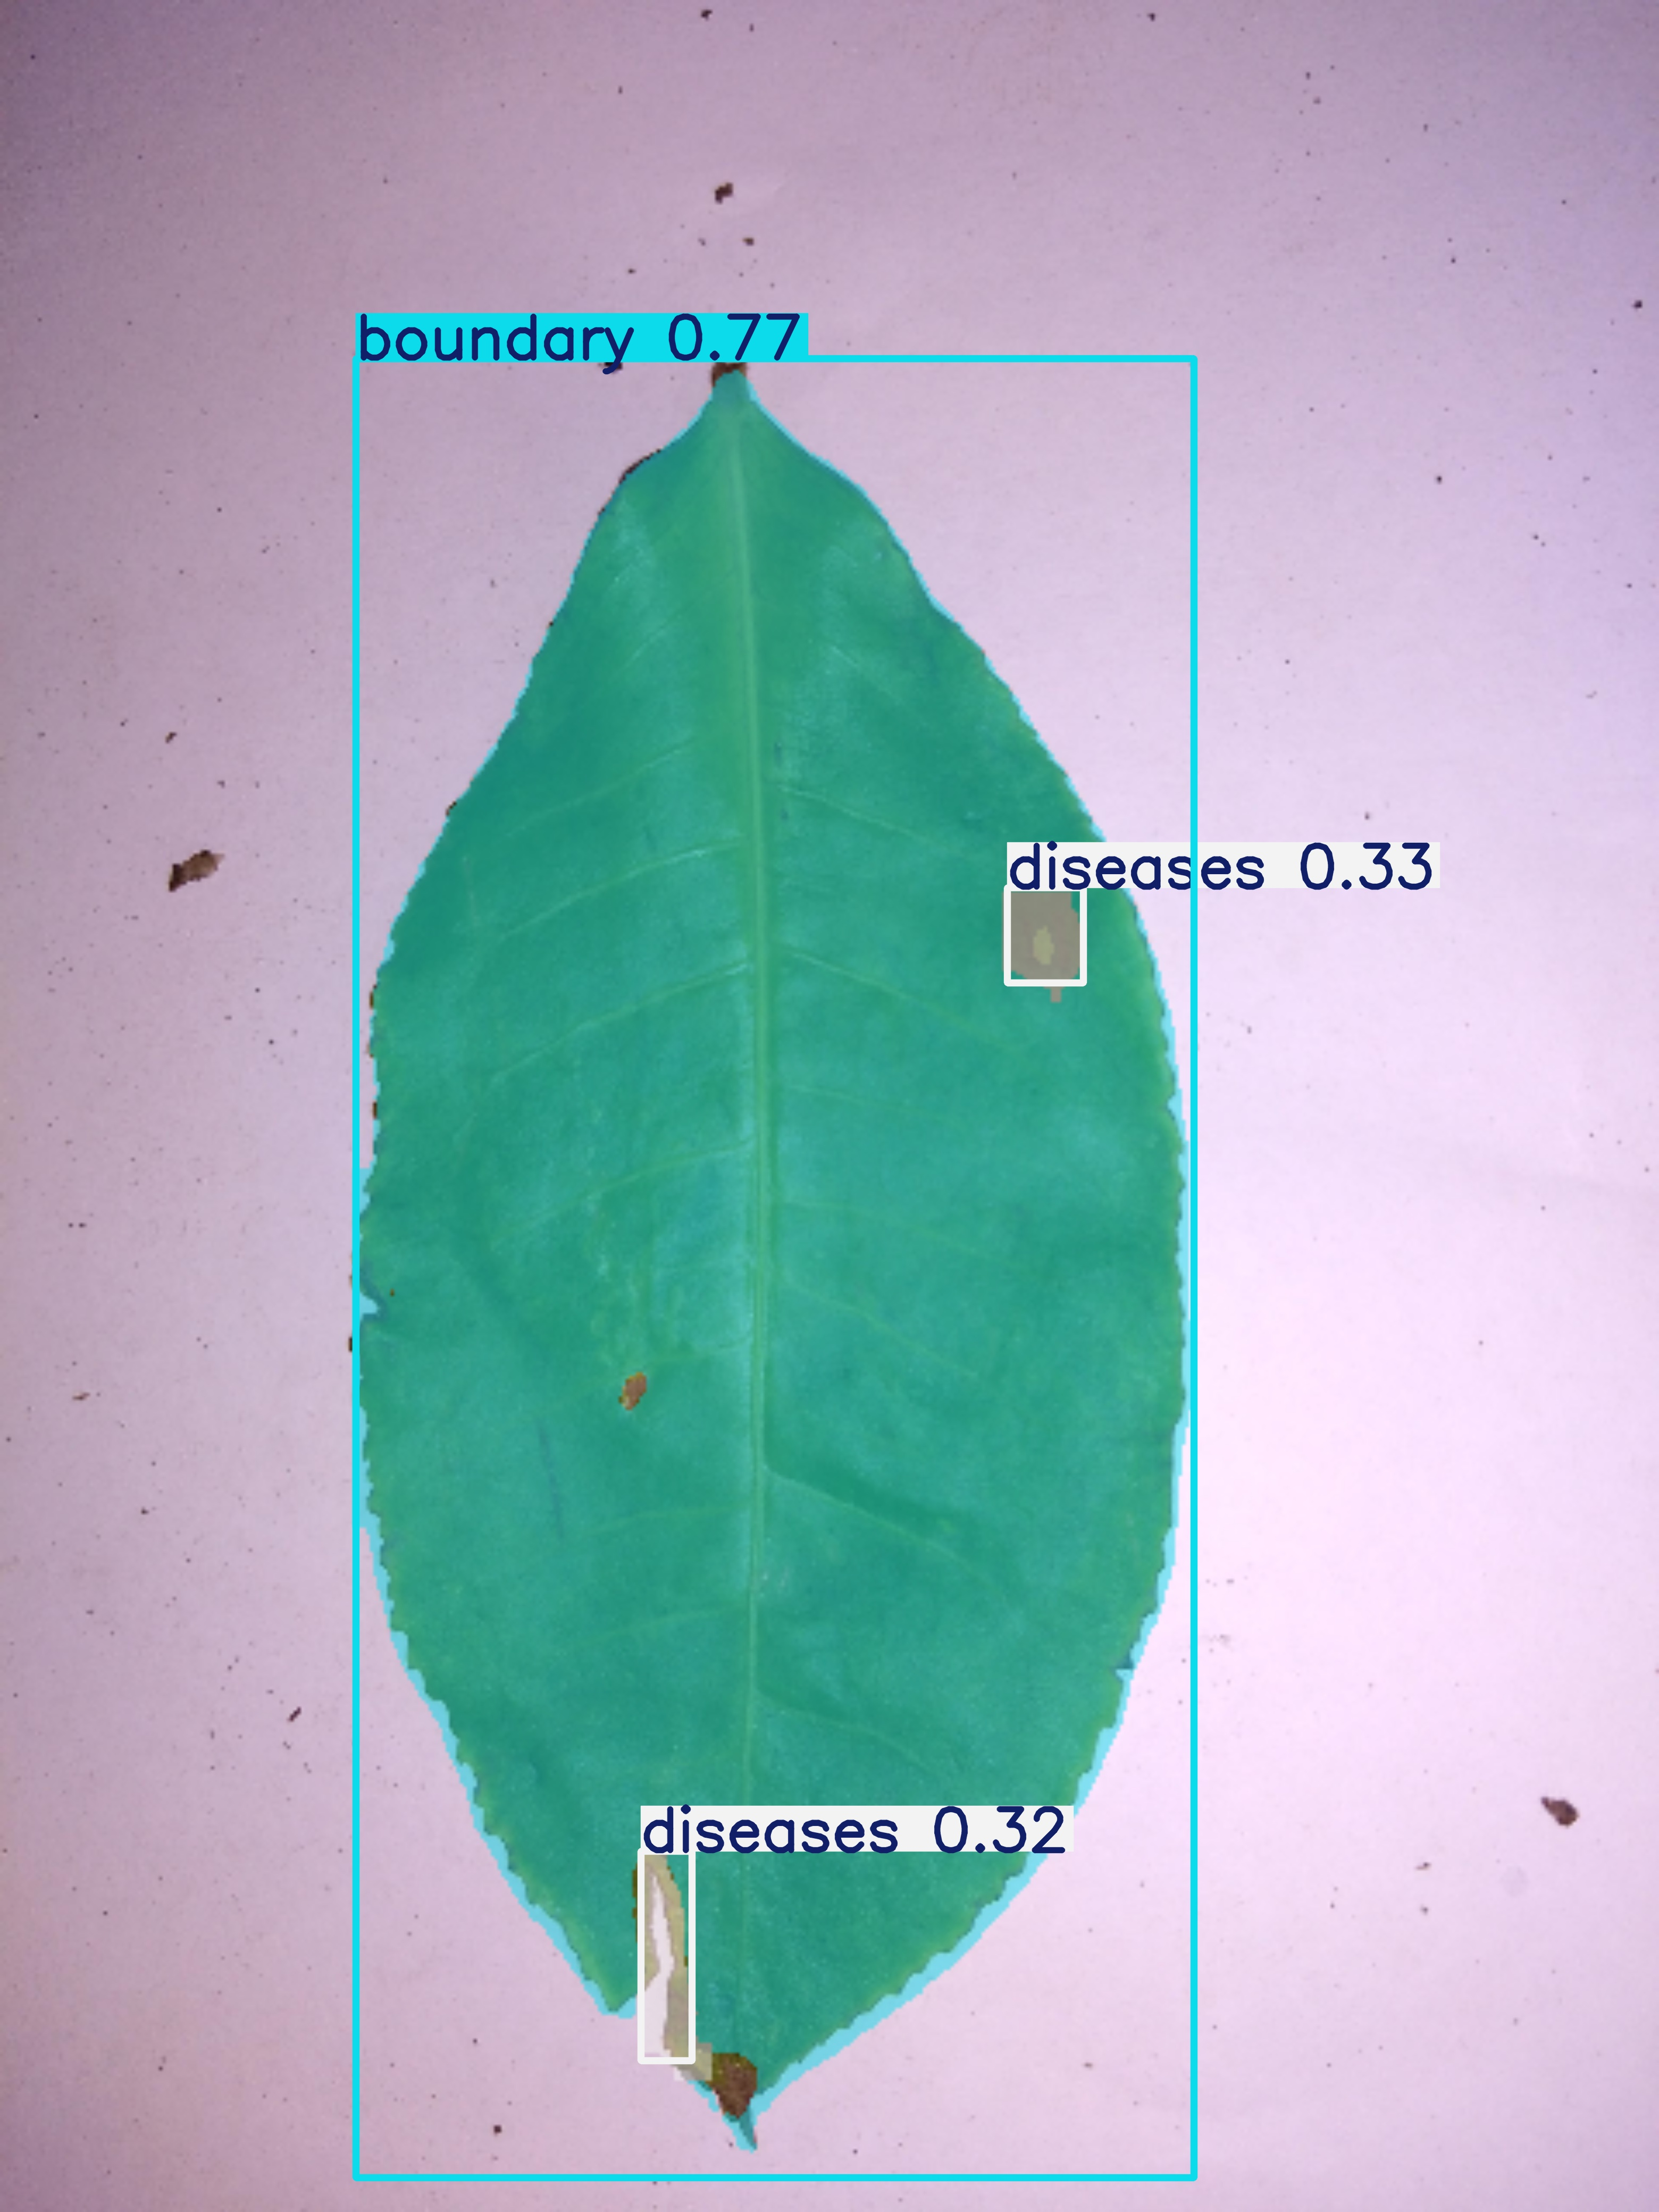

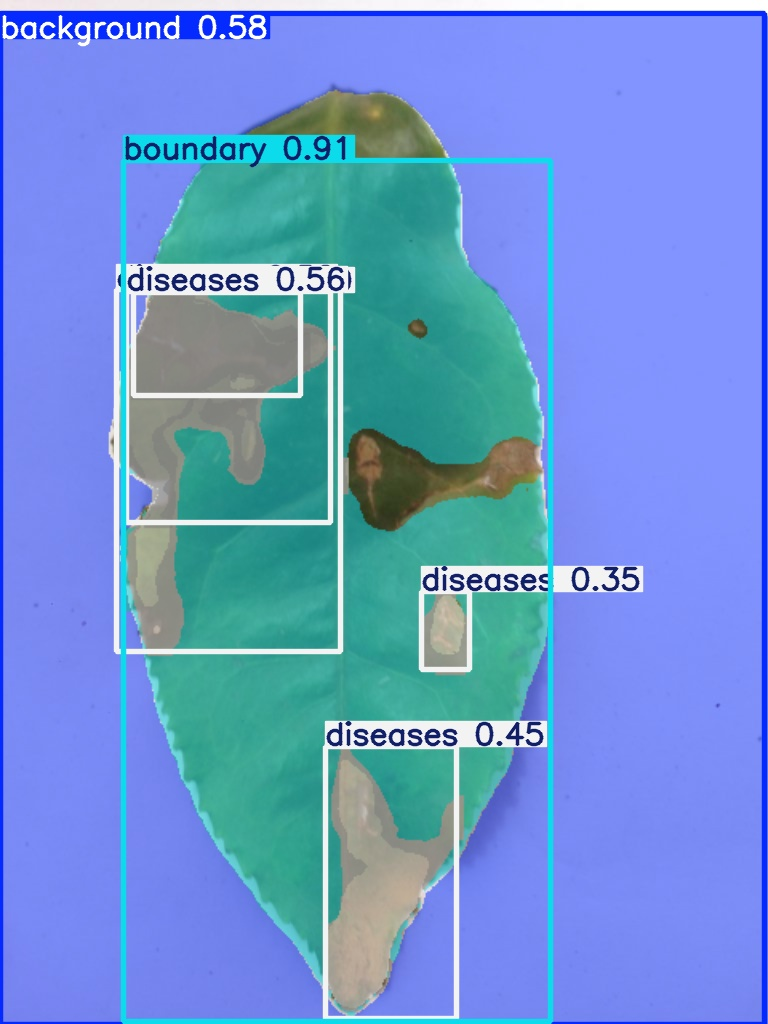

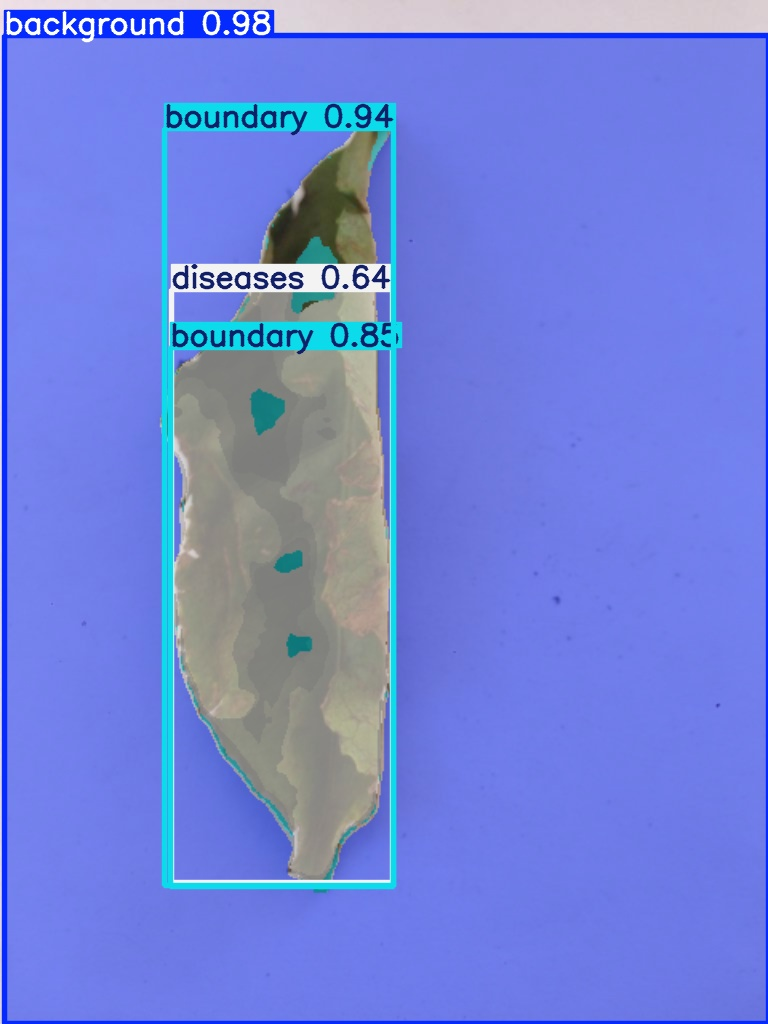

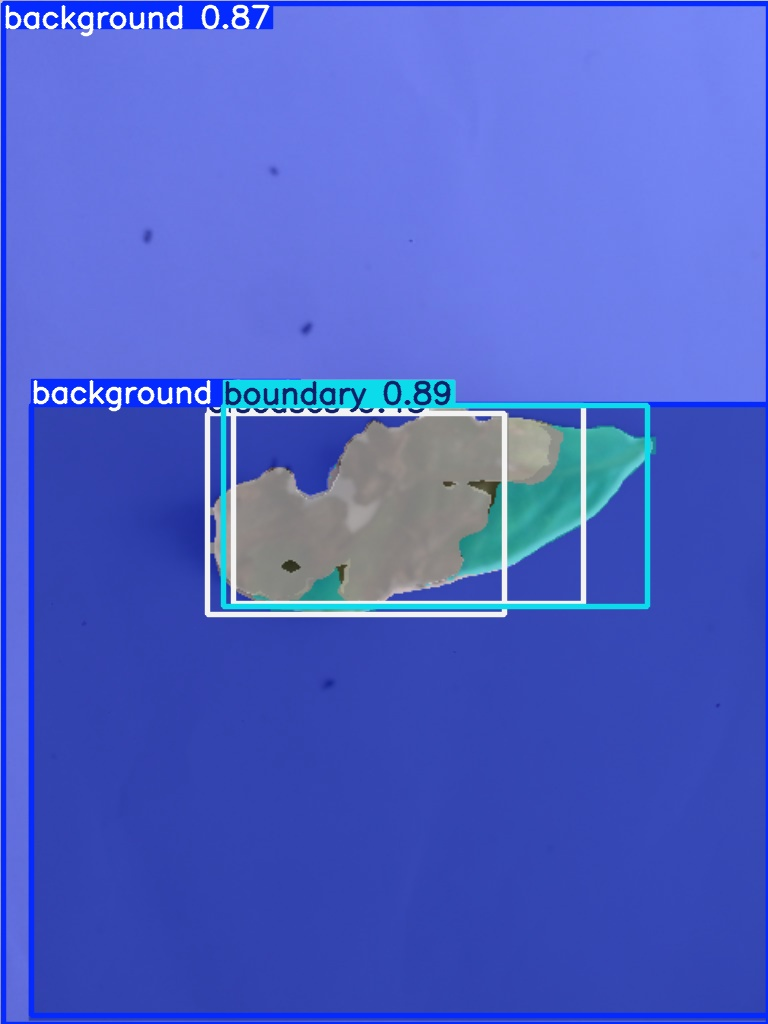

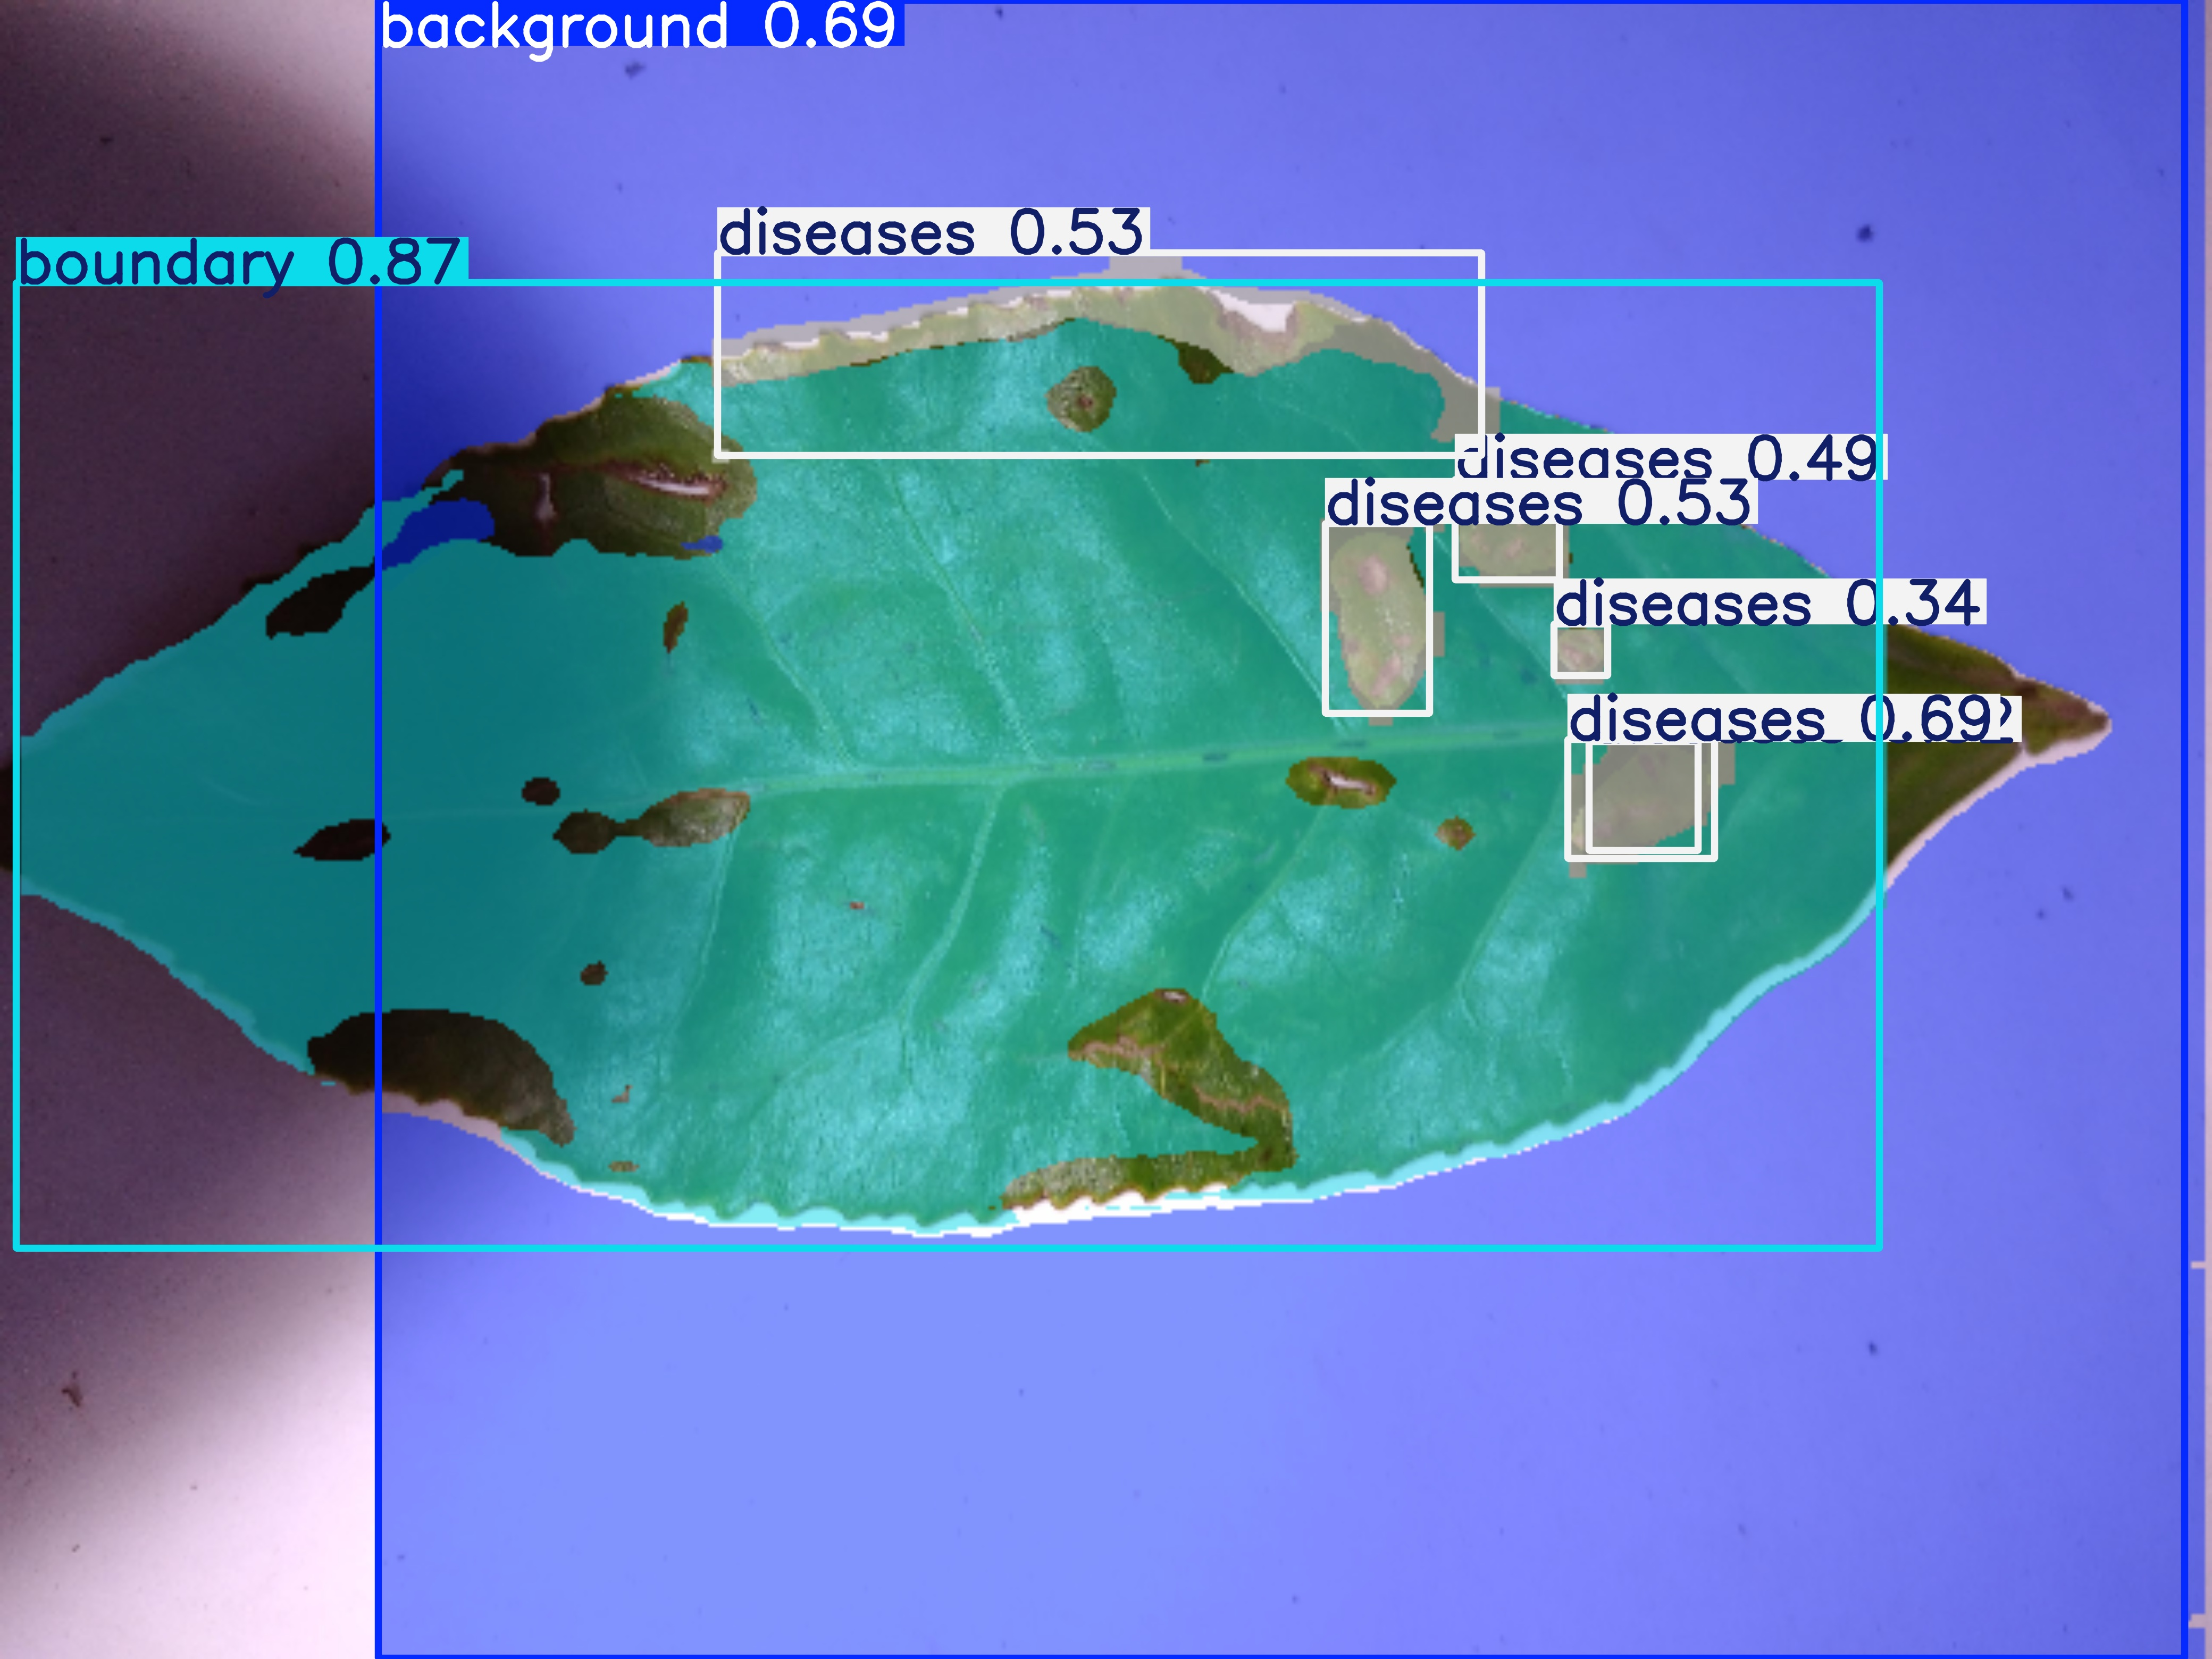

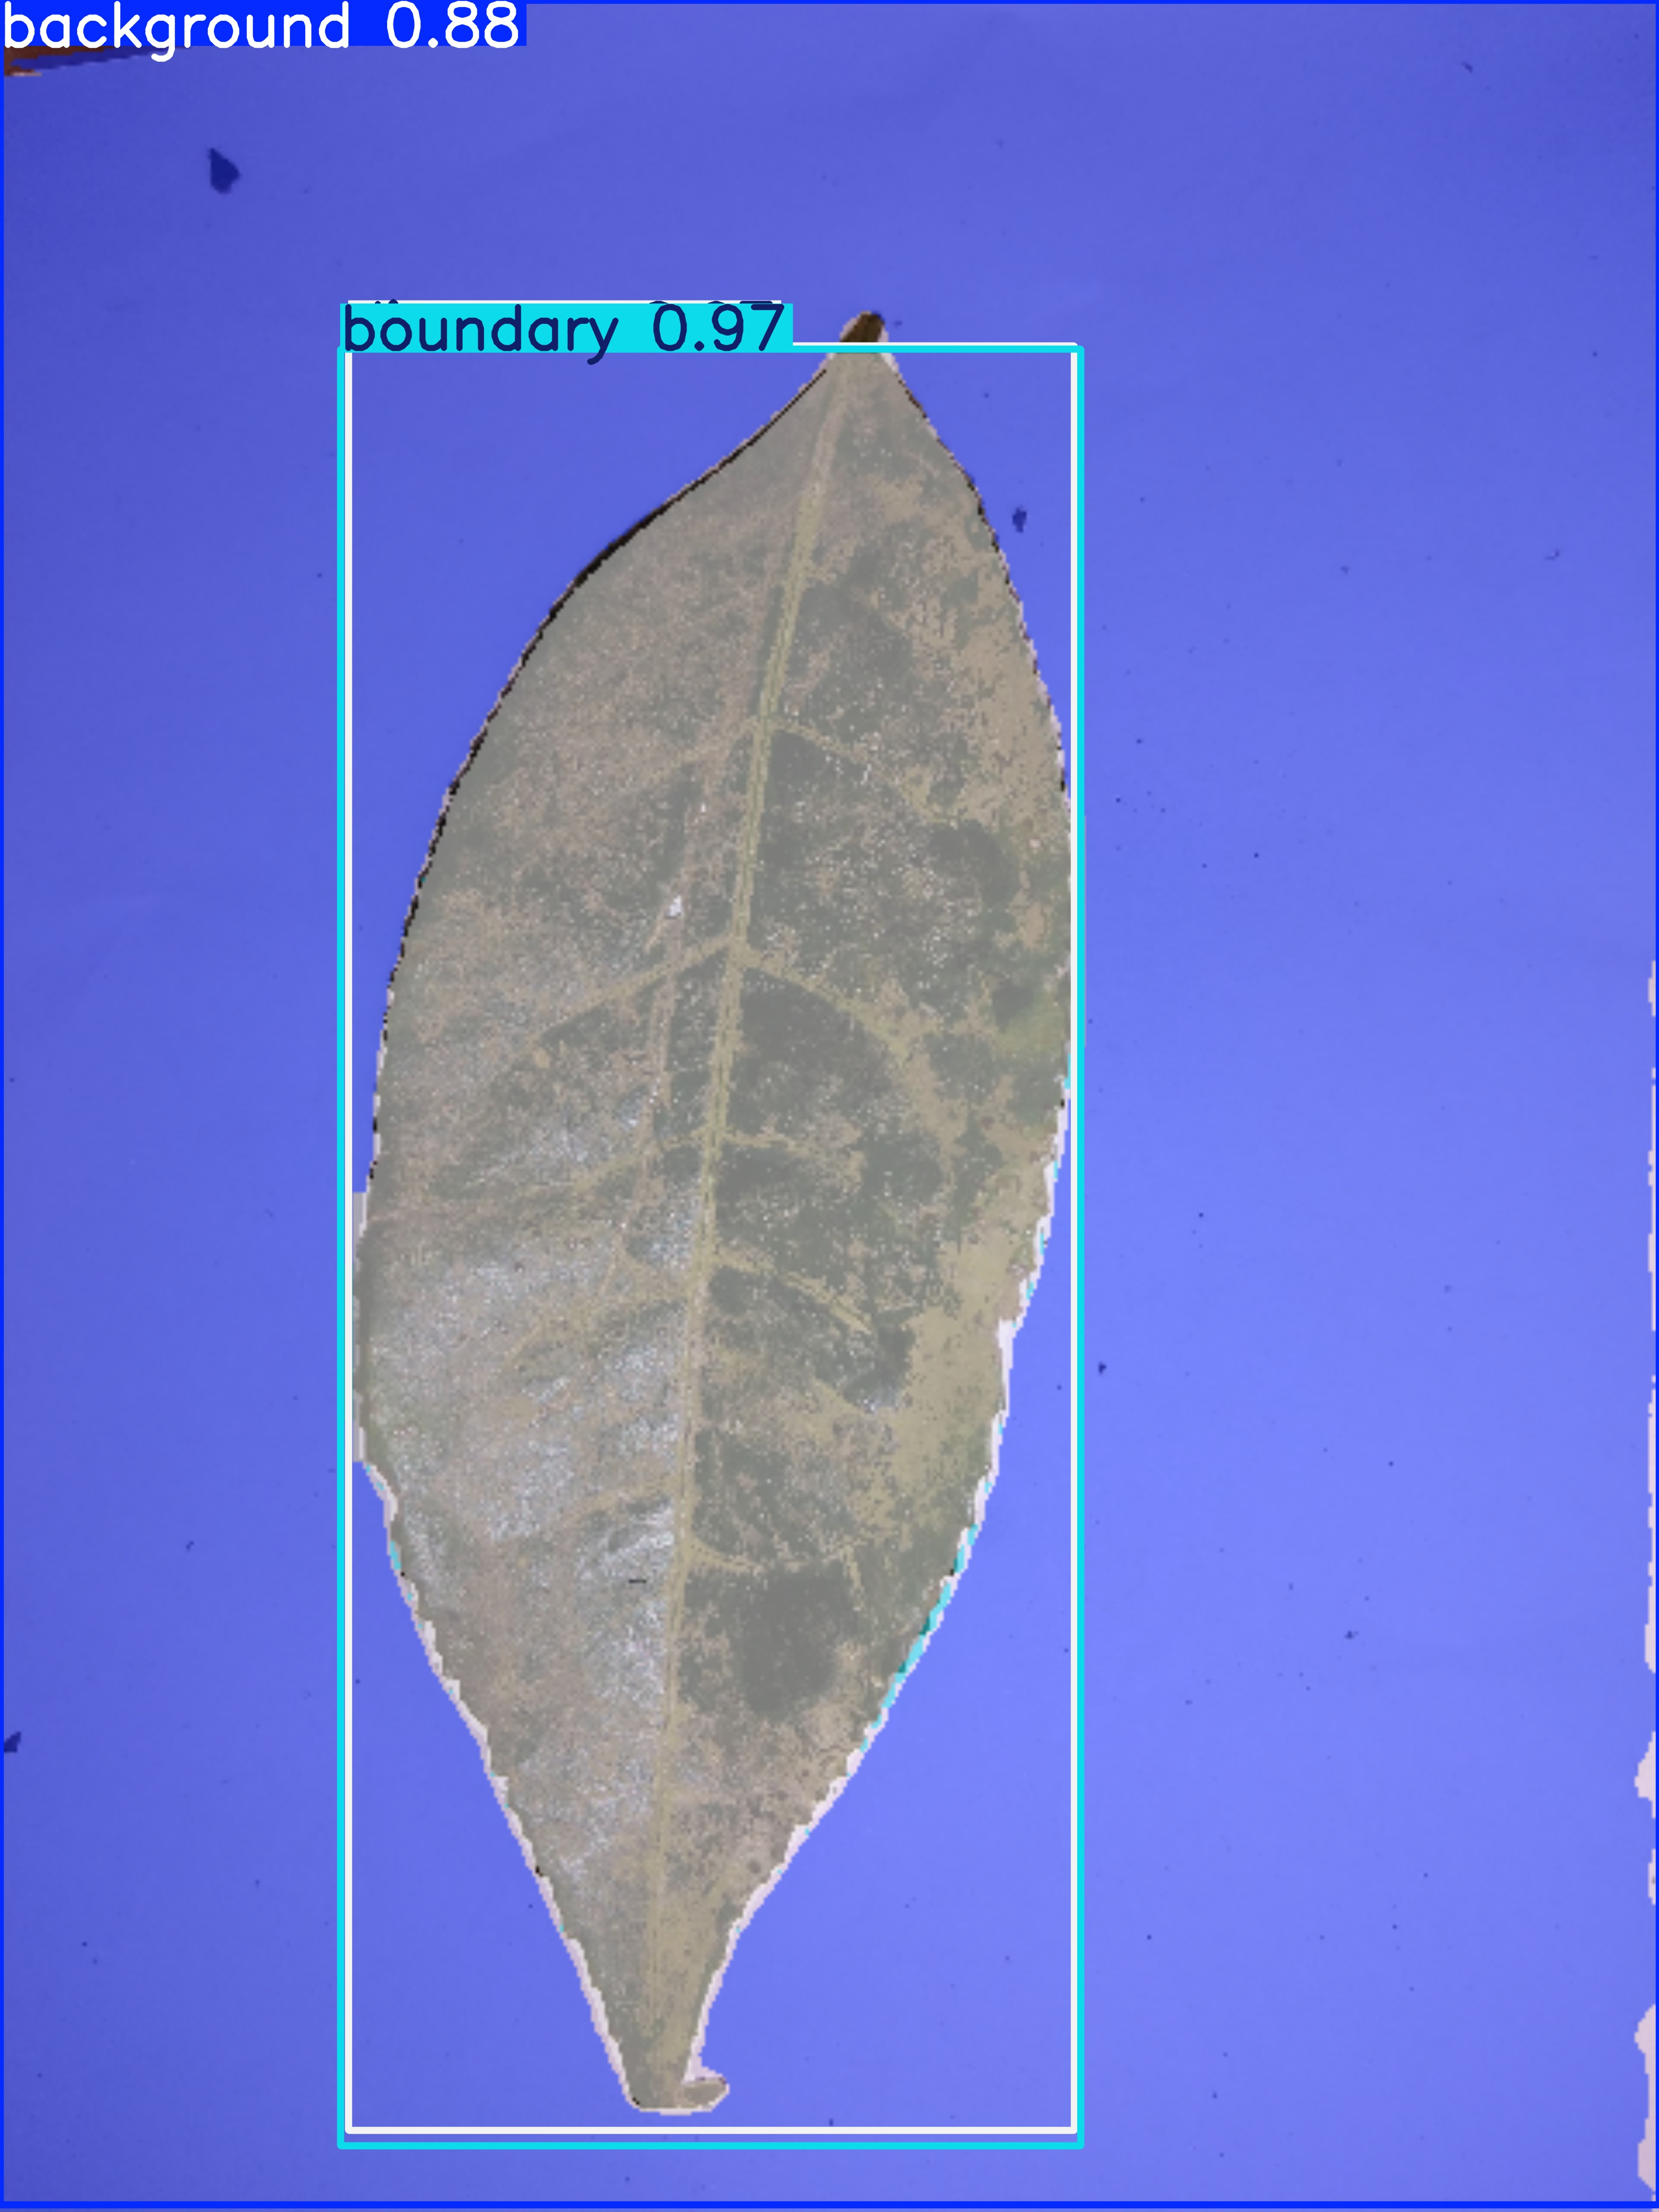

In [ ]:
# Display predicted images
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:6]:
    display(Image(filename=image_path, height=600))
    print("\n")


In [ ]:
# --- 7. Zip and Export Results ---
!zip -r YoloResults1.zip /content/runs

# --- 8. Additional Dataset Setup ---
!mkdir {HOME}/datasets_2
%cd {HOME}/datasets_2
!unzip '/path/to/your/Tea Final Yr.v2i.yolov8-obb.zip'

  adding: content/runs/ (stored 0%)
  adding: content/runs/segment/ (stored 0%)
  adding: content/runs/segment/predict/ (stored 0%)
  adding: content/runs/segment/predict/IMG_20220503_144214_jpg.rf.a4ca3bea8fc8e58290fa61b06407678c.jpg (deflated 2%)
  adding: content/runs/segment/predict/UNADJUSTEDNONRAW_thumb_91_jpg.rf.c8b4cdfab31237e91077f29f1be78a4d.jpg (deflated 6%)
  adding: content/runs/segment/predict/UNADJUSTEDNONRAW_thumb_82_jpg.rf.4e1c4055e871c7caaa3151220f5076fe.jpg (deflated 5%)
  adding: content/runs/segment/predict/UNADJUSTEDNONRAW_thumb_1_jpg.rf.8fcab077e1935fcd399ef935e73bb0d6.jpg (deflated 9%)
  adding: content/runs/segment/predict/IMG_20220503_155807_jpg.rf.83408dab8baf267ccafa7d368958cba2.jpg (deflated 5%)
  adding: content/runs/segment/predict/IMG_20220503_143433_jpg.rf.1362906504c80376ff201d6f88225352.jpg (deflated 5%)
  adding: content/runs/segment/predict/UNADJUSTEDNONRAW_thumb_2d_jpg.rf.6f8e817abe80269ba08e35dc205fae14.jpg (deflated 5%)
  adding: content/runs/seg